In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
def get_train_test(df,test_size=0.5):   
    """Split Data into train and test sets."""
    y = df.action
    X = df.drop(["action"], axis=1)
    X = pd.get_dummies(X,)
    # X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=2)

In [14]:
df_original = pd.read_csv('final_test5.csv')
df_original['action'] = df_original['action'].astype(int)
df_original['priority'] = df_original['priority'].map(lambda x:x/df_original['priority'].max())
df_original = df_original.drop(['handle'],axis=1)

In [92]:
df_original = pd.read_csv('final_test1.csv')
df_original['action'] = df_original['action'].astype(int)
df_original['priority'] = df_original['priority'].map(lambda x:x/df_original['priority'].max())  # priority 归一化
df_original = df_original.drop(['handle'],axis=1)    # 将handle这个特征删掉
for i in range(2,300):
    try:
        filename = 'final_test' + str(i) + '.csv'
        df_tmp = pd.read_csv(filename)
        df_tmp['action'] = df_tmp['action'].astype(int)
        df_tmp['priority'] = df_tmp['priority'].map(lambda x:x/df_tmp['priority'].max())
        df_tmp = df_tmp.drop(['handle'],axis=1)
        df_original = df_original.append(df_tmp, ignore_index=True)
    except Exception as e:
        pass

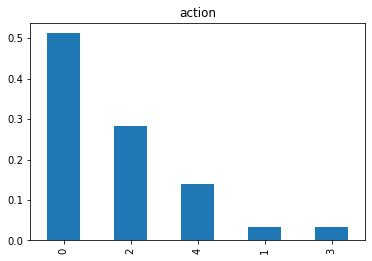

0    334056
2    184100
4     90618
1     21782
3     21679
Name: action, dtype: int64


In [99]:
df_original = df_original.dropna(axis=1,how='any')
df_original.action.value_counts(normalize=True).plot(
    kind="bar", title="action")
plt.show()
print(df_original.action.value_counts(normalize=False))

In [100]:
tmp_0 = df_original[df_original['action']==0].sample(n=21679,random_state=124,axis=0)
tmp_2 = df_original[df_original['action']==2].sample(n=21679,random_state=124,axis=0)
tmp_4 = df_original[df_original['action']==4].sample(n=21679,random_state=124,axis=0)
tmp_1 = df_original[df_original['action']==1].sample(n=21679,random_state=124,axis=0)
tmp_3 = df_original[df_original['action']==3]
df = tmp_0.append([tmp_2,tmp_4,tmp_1,tmp_3], ignore_index=True)
df = df.sample(frac=1)  # shuffle
# xtrain, xtest, ytrain, ytest = get_train_test(df,test_size=0.1)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,:266]
Y = df.iloc[:,266:]
input_dim = X.shape[1]
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
# convert integers to dummy variables (one hot encoding)
dummy_y = np_utils.to_categorical(encoded_Y)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, dummy_y, test_size=0.25, stratify=dummy_y)


model = Sequential()
input = X.shape[1]
# 隐藏层128
model.add(Dense(128, input_shape=(input,)))
model.add(Activation('relu'))
# Dropout层用于防止过拟合
model.add(Dropout(0.2))
# 隐藏层128
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 没有激活函数用于输出层，二分类问题，用sigmoid激活函数进行变换，多分类用softmax。
model.add(Dense(5))
model.add(Activation('softmax'))
# 使用高效的 ADAM 优化算法以，二分类损失函数binary_crossentropy，多分类的损失函数categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# early stoppping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, verbose=2)
# 训练
history = model.fit(train_X, train_y, epochs=300, batch_size=30, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[early_stopping])# loss曲线
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# 预测
y_pre = model.predict_classes(test_X)
y_test=np.array([np.argmax(test_y[i]) for i in range(test_y.shape[0])])
# 
print(classification_report(y_test, y_pre,labels=[0,1,2,3,4]))
print(confusion_matrix(y_test, y_pre))


/home/lomo/anaconda33/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Epoch 1/300
2710/2710 - 10s - loss: 1.2024 - accuracy: 0.4890 - val_loss: 0.8544 - val_accuracy: 0.6263
Epoch 2/300
2710/2710 - 10s - loss: 0.8283 - accuracy: 0.6335 - val_loss: 0.7207 - val_accuracy: 0.6719
Epoch 3/300
2710/2710 - 10s - loss: 0.7546 - accuracy: 0.6635 - val_loss: 0.7047 - val_accuracy: 0.6802
Epoch 4/300
2710/2710 - 10s - loss: 0.7227 - accuracy: 0.6762 - val_loss: 0.6688 - val_accuracy: 0.7111
Epoch 5/300
2710/2710 - 10s - loss: 0.7015 - accuracy: 0.6863 - val_loss: 0.6382 - val_accuracy: 0.7153
Epoch 6/300
2710/2710 - 10s - loss: 0.6817 - accuracy: 0.6943 - val_loss: 0.6351 - val_accuracy: 0.7147
Epoch 7/300
2710/2710 - 10s - loss: 0.6726 - accuracy: 0.6977 - val_loss: 0.6322 - val_accuracy: 0.7163
Epoch 8/300
2710/2710 - 10s - loss: 0.6625 - accuracy: 0.7027 - val_loss: 0.6257 - val_accuracy: 0.7162
Epoch 9/300
2710/2710 - 10s - loss: 0.6627 - accuracy: 0.7009 - val_loss: 0.6281 - val_accuracy: 0.7064
Epoch 10/300
2710/2710 - 10s - loss: 0.6590 - accuracy: 0.7015 -

In [86]:
test_y.shape[0]

4649

In [91]:
0.99**10

0.9043820750088044